TASK 1: PREPROCESS DATASET

In [3]:
!pip install datasets
!pip install transformers

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 521.2/521.2 kB 4.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 115.3/115.3 kB 10.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 13.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 311.7/311.7 kB 18.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.9/7.9 MB 13.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.8/3.8 MB 32.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 36.5 MB/s eta 0:00:00


In [4]:
from datasets import load_dataset
from sklearn.feature_extraction.text import CountVectorizer

# Naive Bayes Data Preprocessing
train_dataset = load_dataset('dair-ai/emotion', split='train')
X_train_NB = train_dataset['text']
y_train_NB = train_dataset['label']

# Print some examples
print("Training Set Examples:")
for i in range(5):
    print(f"Text: {X_train_NB[i]}, Label: {y_train_NB[i]}")

# Vectorize train data
vectorizer = CountVectorizer()
X_train_NB_vectorized = vectorizer.fit_transform(X_train_NB).toarray()
print(X_train_NB_vectorized.shape)

# Print some examples after transformation with CountVectorizer
print("\nExamples after Transformation with CountVectorizer:")
for i in range(5):
    print(f"Transformed Text: {X_train_NB_vectorized[i]}, Label: {y_train_NB[i]}")

# Load test dataset
test_dataset = load_dataset('dair-ai/emotion', split='test')
X_test_NB = test_dataset['text']
y_test_NB = test_dataset['label']

# Vectorize test data
X_test_NB_vectorized = vectorizer.transform(X_test_NB).toarray()


Extracting data files:   0%|          | 0/3 [00:00<?, ?it/s]

Generating train split:   0%|          | 0/16000 [00:00<?, ? examples/s]

Generating validation split:   0%|          | 0/2000 [00:00<?, ? examples/s]

Generating test split:   0%|          | 0/2000 [00:00<?, ? examples/s]

Training Set Examples:
Text: i didnt feel humiliated, Label: 0
Text: i can go from feeling so hopeless to so damned hopeful just from being around someone who cares and is awake, Label: 0
Text: im grabbing a minute to post i feel greedy wrong, Label: 3
Text: i am ever feeling nostalgic about the fireplace i will know that it is still on the property, Label: 2
Text: i am feeling grouchy, Label: 3
(16000, 15186)

Examples after Transformation with CountVectorizer:
Transformed Text: [0 0 0 ... 0 0 0], Label: 0
Transformed Text: [0 0 0 ... 0 0 0], Label: 0
Transformed Text: [0 0 0 ... 0 0 0], Label: 3
Transformed Text: [0 0 0 ... 0 0 0], Label: 2
Transformed Text: [0 0 0 ... 0 0 0], Label: 3


In [ ]:
from transformers import BertTokenizer, TFBertForSequenceClassification, DataCollatorWithPadding
from tqdm import tqdm
from datasets import load_dataset
import numpy as np
from datasets import DatasetDict
import tensorflow as tf

# BERT Data Preprocessing
dataset = load_dataset("dair-ai/emotion")

# Tokenize
tokenizer = BertTokenizer.from_pretrained('bhadresh-savani/bert-base-uncased-emotion')

test_valid = dataset["test"].train_test_split(test_size=0.5)
train = (dataset["train"].shuffle()).shard(num_shards=4, index=0)
test = (test_valid["test"].shuffle()).shard(num_shards=4, index=0)
valid = (test_valid["train"].shuffle()).shard(num_shards=4, index=0) #validation
datasets = DatasetDict({ "train": (train), "test": (test), "valid": (valid)})

def tokenize_function(set):
    return tokenizer(set["text"], truncation=True)

tokenized_datasets = datasets.map(tokenize_function, batched=True)
data_collator = DataCollatorWithPadding(tokenizer=tokenizer, return_tensors="tf")

# TensorFlow
tf_train_dataset = tokenized_datasets["train"].to_tf_dataset(
    columns=["attention_mask", "input_ids", "token_type_ids"],
    label_cols=["labels"],
    shuffle=True,
    collate_fn=data_collator,
    batch_size=8,
)

tf_test_dataset = tokenized_datasets["test"].to_tf_dataset(
    columns=["attention_mask", "input_ids", "token_type_ids"],
    label_cols=["labels"],
    shuffle=False,
    collate_fn=data_collator,
    batch_size=8,
)

tf_validation_dataset = tokenized_datasets["valid"].to_tf_dataset(
    columns=["attention_mask", "input_ids", "token_type_ids"],
    label_cols=["labels"],
    shuffle=False,
    collate_fn=data_collator,
    batch_size=8,
)

(…)otion/resolve/main/tokenizer_config.json:   0%|          | 0.00/285 [00:00<?, ?B/s]

(…)e-uncased-emotion/resolve/main/vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

(…)ion/resolve/main/special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

(…)ased-emotion/resolve/main/tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

(…)uncased-emotion/resolve/main/config.json:   0%|          | 0.00/935 [00:00<?, ?B/s]

Map:   0%|          | 0/4000 [00:00<?, ? examples/s]

Map:   0%|          | 0/250 [00:00<?, ? examples/s]

Map:   0%|          | 0/250 [00:00<?, ? examples/s]

/usr/local/lib/python3.10/dist-packages/datasets/arrow_dataset.py:399: FutureWarning: The output of `to_tf_dataset` will change when a passing single element list for `labels` or `columns` in the next datasets version. To return a tuple structure rather than dict, pass a single string.
Old behaviour: columns=['a'], labels=['labels'] -> (tf.Tensor, tf.Tensor)  
             : columns='a', labels='labels' -> (tf.Tensor, tf.Tensor)  
New behaviour: columns=['a'],labels=['labels'] -> ({'a': tf.Tensor}, {'labels': tf.Tensor})  
             : columns='a', labels='labels' -> (tf.Tensor, tf.Tensor) 
  warnings.warn(


TASK 2: IMPLEMENT NAIVE BAYES AND BERT MODELS + TASK 3 OF BERT MODEL


In [1]:
import numpy as np
import itertools
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn import datasets
np.random.seed(1234)

# inspired by gaussian naive bayes of the course
class MultinomialNaiveBayes:
    def __init__(self):
        return

    def fit(self, x, y, myalpha=1):
        N, D = x.shape
        C = np.max(y) + 1
        feature_counts = np.zeros((C, D))
        class_counts = np.zeros(C)
        for c in range(C):
            x_c = x[np.where(y == c)]
            class_counts[c] = x_c.shape[0]
            feature_counts[c, :] = np.sum(x_c, axis=0)
        self.feature_counts = feature_counts
        self.class_counts = class_counts
        self.class_probs = class_counts / N
        self.feature_probs = (feature_counts + myalpha) / (np.sum(feature_counts, axis=1)[:, None] + myalpha * D)
        self.y_pred = []
        return self

    def predict(self, xt):
        Nt, D = xt.shape
        log_prior = np.log(self.class_probs)
        log_likelihood = xt @ np.log(self.feature_probs.T)
        log_posterior = log_prior + log_likelihood
        posterior = np.exp(log_posterior - logsumexp(log_posterior))
        self.y_pred = np.argmax(posterior, axis=1)
        return posterior

    def evaluate_acc(self, y_test):
        y_pred = self.y_pred
        return np.sum(y_pred == y_test) / y_pred.shape[0]


def logsumexp(Z):  # dimension C x N
    Zmax = np.max(Z, axis=0)[None, :]  # max over C
    log_sum_exp = Zmax + np.log(np.sum(np.exp(Z - Zmax), axis=0))
    return log_sum_exp

Some weights of the PyTorch model were not used when initializing the TF 2.0 model TFBertForSequenceClassification: ['bert.embeddings.position_ids']
- This IS expected if you are initializing TFBertForSequenceClassification from a PyTorch model trained on another task or with another architecture (e.g. initializing a TFBertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFBertForSequenceClassification from a PyTorch model that you expect to be exactly identical (e.g. initializing a TFBertForSequenceClassification model from a BertForSequenceClassification model).
All the weights of TFBertForSequenceClassification were initialized from the PyTorch model.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFBertForSequenceClassification for predictions without further training.


500/500 [==============================] - 3322s 7s/step - loss: 0.2176 - accuracy: 0.9243 - val_loss: 0.2297 - val_accuracy: 0.9120


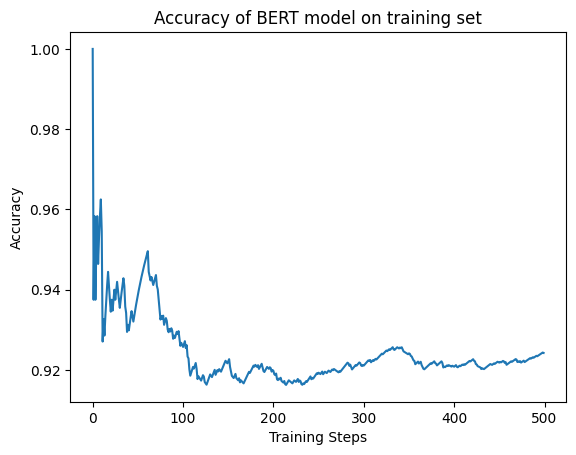

In [ ]:
from tensorflow.keras.optimizers.schedules import PolynomialDecay
from tensorflow.keras.optimizers import Adam
batch_size = 8
num_epochs = 3

num_train_steps = len(tf_train_dataset) * num_epochs
lr_scheduler = PolynomialDecay(
    initial_learning_rate=5e-5, end_learning_rate=0.0, decay_steps=num_train_steps
)

opt = Adam(learning_rate=lr_scheduler)

accuracy_list = []
accuracy_callback = tf.keras.callbacks.LambdaCallback(
    on_train_batch_end=lambda batch, logs: accuracy_list.append(logs['accuracy'])
)

model = TFBertForSequenceClassification.from_pretrained('bhadresh-savani/bert-base-uncased-emotion', num_labels=6)
model.compile(
    optimizer=opt,
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics=tf.keras.metrics.SparseCategoricalAccuracy('accuracy'),
)
records = model.fit(
    tf_train_dataset,
    validation_data=tf_validation_dataset,
    callbacks=[accuracy_callback] #This is where accuracy at every step is appended to accuracy_list
)

import matplotlib.pyplot as plt
plt.plot(accuracy_list) #Accuracy of BERT on the training set for each training steps
plt.title("Accuracy of BERT model on training set")
plt.xlabel("Training Steps")
plt.ylabel("Accuracy")
plt.show()

Some weights of the PyTorch model were not used when initializing the TF 2.0 model TFBertForSequenceClassification: ['bert.embeddings.position_ids']
- This IS expected if you are initializing TFBertForSequenceClassification from a PyTorch model trained on another task or with another architecture (e.g. initializing a TFBertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFBertForSequenceClassification from a PyTorch model that you expect to be exactly identical (e.g. initializing a TFBertForSequenceClassification model from a BertForSequenceClassification model).
All the weights of TFBertForSequenceClassification were initialized from the PyTorch model.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFBertForSequenceClassification for predictions without further training.


500/500 [==============================] - 2604s 5s/step - loss: 0.2357 - accuracy: 0.9205 - val_loss: 0.2684 - val_accuracy: 0.9040


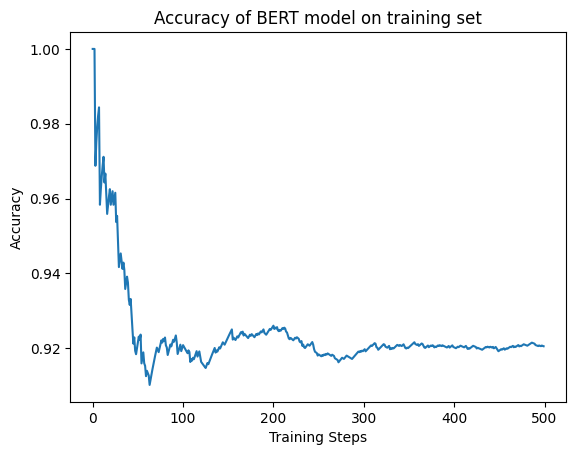

In [ ]:
from transformers import BertConfig
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.optimizers.schedules import PolynomialDecay


model = TFBertForSequenceClassification.from_pretrained('bhadresh-savani/bert-base-uncased-emotion', num_labels=6)
config = BertConfig.from_pretrained('bhadresh-savani/bert-base-uncased-emotion', num_labels=6)
batch_size = 8
num_epochs = 3

num_train_steps = len(tf_train_dataset) * num_epochs
lr_scheduler = PolynomialDecay(
    initial_learning_rate=5e-5, end_learning_rate=0.0, decay_steps=num_train_steps
)

optim = Adam(learning_rate=lr_scheduler)

# Finetuning
# https://huggingface.co/bert-base-uncased/blob/main/config.json
# original config: 12 for hidden layers, 12 for attention heads and 0.1 for dropout prob, "intermediate_size": 3072, "hidden_size": 768,
# I doubled every parameter to see the effect
config.num_hidden_layers = 24
config.num_attention_heads = 24
config.hidden_dropout_prob = 0.2
config.attention_probs_dropout_prob = 0.2
config.hidden_size = 1536
config.intermediate_size = 6144


model.config = config
acc = []
accuracy_callback = tf.keras.callbacks.LambdaCallback(
    on_train_batch_end=lambda batch, logs: acc.append(logs['accuracy'])
)
# Fine tune the last 4 layers
for layer in model.layers[:-4]:
    layer.trainable = False

model.compile(
    optimizer=optim,
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics=tf.keras.metrics.SparseCategoricalAccuracy('accuracy'),
)

records = model.fit(
    tf_train_dataset,
    validation_data=tf_validation_dataset,
    callbacks=[accuracy_callback]
)

import matplotlib.pyplot as plt
plt.plot(acc) #Accuracy of BERT on the training set for each training steps
plt.title("Accuracy of BERT model on training set")
plt.xlabel("Training Steps")
plt.ylabel("Accuracy")
plt.show()

model.safetensors:   0%|          | 0.00/438M [00:00<?, ?B/s]

Some weights of the PyTorch model were not used when initializing the TF 2.0 model TFBertForSequenceClassification: ['bert.embeddings.position_ids']
- This IS expected if you are initializing TFBertForSequenceClassification from a PyTorch model trained on another task or with another architecture (e.g. initializing a TFBertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFBertForSequenceClassification from a PyTorch model that you expect to be exactly identical (e.g. initializing a TFBertForSequenceClassification model from a BertForSequenceClassification model).
All the weights of TFBertForSequenceClassification were initialized from the PyTorch model.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFBertForSequenceClassification for predictions without further training.


500/500 [==============================] - 2968s 6s/step - loss: 0.1842 - accuracy: 0.9345 - val_loss: 0.1617 - val_accuracy: 0.9320


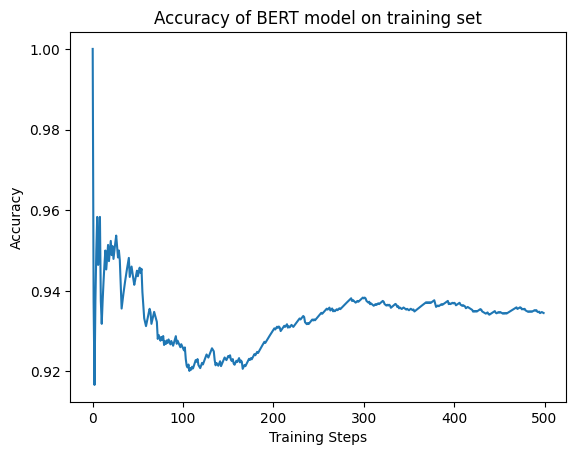

In [ ]:
from transformers import BertConfig
from tensorflow.keras.optimizers.schedules import PolynomialDecay
from tensorflow.keras.optimizers import Adam

model = TFBertForSequenceClassification.from_pretrained('bhadresh-savani/bert-base-uncased-emotion', num_labels=6)
config = BertConfig.from_pretrained('bhadresh-savani/bert-base-uncased-emotion', num_labels=6)
batch_size = 8
num_epochs = 3

num_train_steps = len(tf_train_dataset) * num_epochs
lr_scheduler = PolynomialDecay(
    initial_learning_rate=5e-5, end_learning_rate=0.0, decay_steps=num_train_steps
)

optim = Adam(learning_rate=lr_scheduler)

# Finetuning
# https://huggingface.co/bert-base-uncased/blob/main/config.json
# original config: 12 for hidden layers, 12 for attention heads and 0.1 for dropout prob, "intermediate_size": 3072, "hidden_size": 768,
# I divided by 2 every parameter to see the effect
config.num_hidden_layers = 6
config.num_attention_heads = 6
config.hidden_dropout_prob = 0.05
config.attention_probs_dropout_prob = 0.05
config.hidden_size = 384
config.intermediate_size = 1536

model.config = config
accuracy_list = []
accuracy_callback = tf.keras.callbacks.LambdaCallback(
    on_train_batch_end=lambda batch, logs: accuracy_list.append(logs['accuracy'])
)
# Fine tune the last 4 layers
for layer in model.layers[:-4]:
    layer.trainable = False

model.compile(
    optimizer=optim,
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics=tf.keras.metrics.SparseCategoricalAccuracy('accuracy'),
)

records = model.fit(
    tf_train_dataset,
    validation_data=tf_validation_dataset,
    callbacks=[accuracy_callback]
)

import matplotlib.pyplot as plt
plt.plot(accuracy_list) #Accuracy of BERT on the training set for each training steps
plt.title("Accuracy of BERT model on training set")
plt.xlabel("Training Steps")
plt.ylabel("Accuracy")
plt.show()

TASK 3: RUN EXPERIMENTS


In [6]:
from sklearn import model_selection

model = MultinomialNaiveBayes()
model.fit(np.asarray(X_train_NB_vectorized), np.asarray(y_train_NB), myalpha=0.5)
train_x = np.asarray(X_train_NB_vectorized)
y_prob = model.predict(X_test_NB_vectorized)

y_pred = np.argmax(y_prob, 1)
accuracy = model.evaluate_acc(y_test_NB)
print(f'Naive Bayes Test Accuracy: {accuracy}')

Naive Bayes Test Accuracy: 0.7975


In [7]:
from transformers import pipeline
classifier = pipeline("text-classification",model='bhadresh-savani/bert-base-uncased-emotion', return_all_scores=True)
prediction = classifier("I love using transformers. The best part is wide range of support and its easy to use", )
print(prediction)


(…)uncased-emotion/resolve/main/config.json:   0%|          | 0.00/935 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/438M [00:00<?, ?B/s]

(…)otion/resolve/main/tokenizer_config.json:   0%|          | 0.00/285 [00:00<?, ?B/s]

(…)e-uncased-emotion/resolve/main/vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

(…)ased-emotion/resolve/main/tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

(…)ion/resolve/main/special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

/usr/local/lib/python3.10/dist-packages/transformers/pipelines/text_classification.py:105: UserWarning: `return_all_scores` is now deprecated,  if want a similar functionality use `top_k=None` instead of `return_all_scores=True` or `top_k=1` instead of `return_all_scores=False`.
  warnings.warn(


[[{'label': 'sadness', 'score': 0.0005138233536854386}, {'label': 'joy', 'score': 0.9972521662712097}, {'label': 'love', 'score': 0.000744332792237401}, {'label': 'anger', 'score': 0.0007404928910546005}, {'label': 'fear', 'score': 0.0003293853369541466}, {'label': 'surprise', 'score': 0.00041974865598604083}]]


In [ ]:
# Selecting an index for batch processing in attention matrix analysis for emotion detection.
analysis_batch_idx = 17

# Retrieving the texts for the chosen batch from the test portion of the dataset.
# Multiplying by 8 as it represents the size of each batch.
emotional_texts = tokenized_datasets["test"]['text'][analysis_batch_idx * 8: (analysis_batch_idx + 1) * 8]

# Displaying the first text from our selection to ensure we have the correct batch.
print("First text for review:", emotional_texts[0])

# Specifying the layer and head of the transformer model for detailed examination.
# BERT's architecture is divided into several layers, each with a set of heads for attention.
selected_layer = 1  # Selecting the second layer
selected_head = 2  # Selecting the third head

# Preparing lists to catalog the indices of accurately and inaccurately predicted texts.
correct_predictions_indices = []
incorrect_predictions_indices = []

# A list to record the nature of each prediction for later review.
predictions_quality = []

# Analyzing the specified batch to assess the model's predictive accuracy and attention focus.
# Skipping to the chosen batch and taking a single batch from the test data.
for input_data, true_labels in tf_test_dataset.skip(analysis_batch_idx).take(1):
    # Running the model to acquire both the predictions and the attention details.
    model_output = model(input_data, output_attentions=True)

    # Predicting emotions for the batch using the model's output logits.
    emotion_predictions = model.predict(input_data)
    prediction_scores = emotion_predictions.logits

    # Identifying the most probable labels from the prediction scores.
    top_predictions = np.argmax(prediction_scores, axis=1)

    # Converting TensorFlow tensors to NumPy for label comparison.
    actual_labels = true_labels.numpy()

    # Reviewing each prediction to classify it as correct or incorrect.
    for idx, actual_label in enumerate(actual_labels):
        # Displaying the text under review.
        print(f'Reviewed Text: {emotional_texts[idx]}')

        # Validating the prediction against the actual label.
        if actual_label == top_predictions[idx]:
            # Classifying the prediction as accurately identified.
            outcome = "Correctly identified" if actual_label else "Correctly rejected"
            print(f'Prediction was accurate: {outcome}')
            # Logging the index for correct predictions.
            correct_predictions_indices.append(idx)
        else:
            # Classifying the prediction as missed.
            outcome = "Missed identification" if actual_label else "Incorrect rejection"
            print(f'Prediction was inaccurate: {outcome}')
            # Logging the index for incorrect predictions.
            incorrect_predictions_indices.append(idx)

        # Recording the descriptive outcome for each reviewed text.
        predictions_quality.append(outcome)


First text for review: when i learnt that my best friend had failed the exams
1/1 [==============================] - 1s 991ms/step
Reviewed Text: when i learnt that my best friend had failed the exams
Prediction was inaccurate: Missed identification
Reviewed Text: i am balancing on my hands with my feet hanging over and it feels like pretty far and im terrified to let them drop but im totally calm at the same time hanging here
Prediction was accurate: Correctly identified
Reviewed Text: i wanna feel good again
Prediction was accurate: Correctly identified
Reviewed Text: i felt it had a slight bitterness in the finish that detracted from its oily mouthfeel and sweet entry
Prediction was inaccurate: Missed identification
Reviewed Text: i was like should i feel sweet or feel offended
Prediction was inaccurate: Missed identification
Reviewed Text: i believe feeling duality suffering soul growth tells of an ending or a decline or a change of direction often one associated with emotions and 

In [ ]:
# Arrays to collect attention matrices for further investigation.
AttentionMatricesForCorrect = []
AttentionMatricesForIncorrect = []

# Selection of a particular layer and head within the BERT architecture for attention analysis.
# BERT typically has 12 layers (numbered 0 through 11).
analysis_layer = 1
# Each layer has multiple heads; here we choose the second head for detailed examination.
head_for_analysis = 1

# Compiling attention matrices for texts where the emotion was correctly predicted.
for idx in correct_predictions_indices:
    # Append the attention matrix for the correct prediction to the corresponding list.
    AttentionMatricesForCorrect.append(model_output.attentions[analysis_layer][idx][head_for_analysis])
    # If we have gathered as many correct matrices as the lesser of correct or incorrect predictions, stop to balance the comparison.
    if len(AttentionMatricesForCorrect) >= min(len(correct_predictions_indices), len(incorrect_predictions_indices)):
        break

# Gathering attention matrices for texts where the emotion prediction was incorrect.
for idx in incorrect_predictions_indices:
    # Append the attention matrix for the incorrect prediction to the corresponding list.
    AttentionMatricesForIncorrect.append(model_output.attentions[analysis_layer][idx][head_for_analysis])
    # Stop once we've collected a number of incorrect matrices equal to the number of correct ones for a balanced analysis.
    if len(AttentionMatricesForIncorrect) >= min(len(correct_predictions_indices), len(incorrect_predictions_indices)):
        break


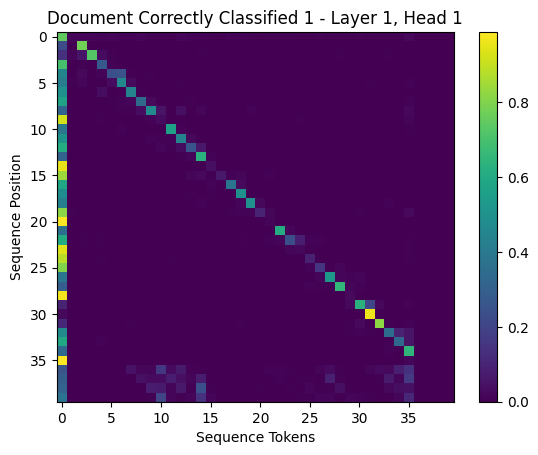

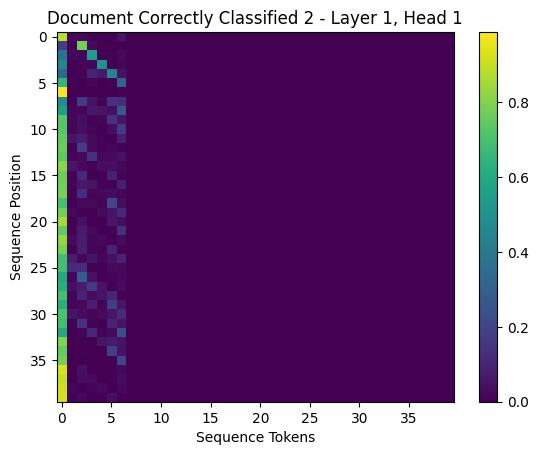

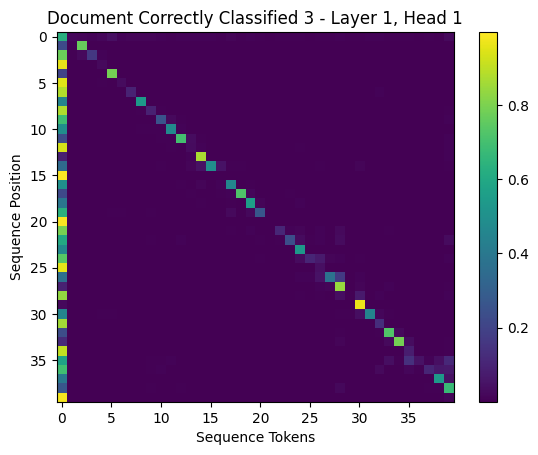

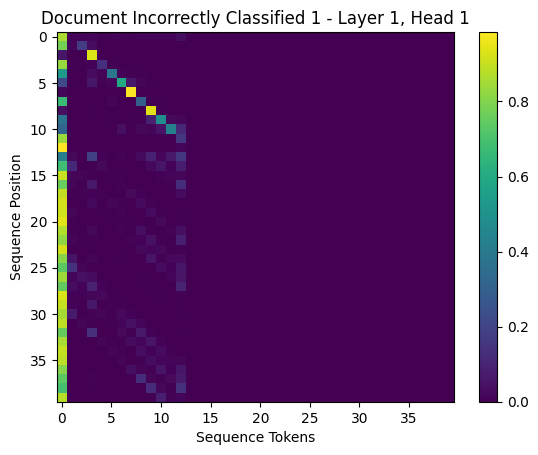

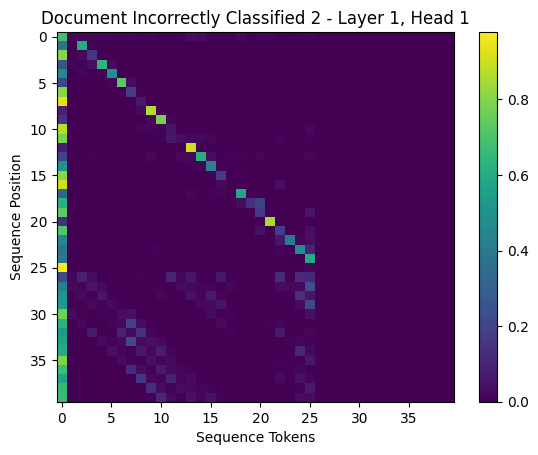

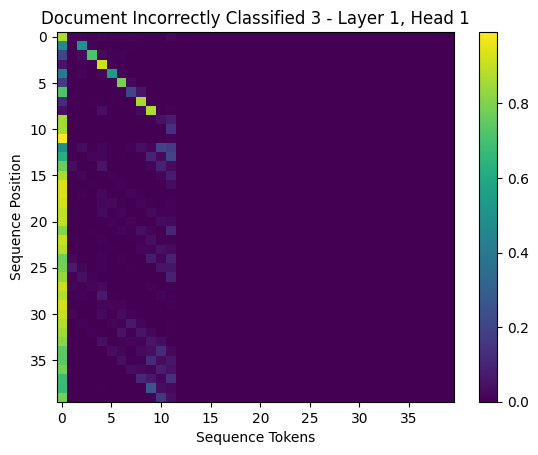

In [ ]:
import matplotlib.pyplot as plt

# Define a new function for visualizing the attention weights.
def visualize_attention_weights(attention_weights, figure_title):
    # Display the attention weights as a heatmap.
    plt.imshow(attention_weights, cmap='viridis', aspect='auto')
    plt.title(figure_title)
    plt.xlabel("Sequence Tokens")
    plt.ylabel("Sequence Position")
    plt.colorbar()
    plt.show()

# Visualize the attention weights for correctly classified text entries.
for index, attn_weights in enumerate(AttentionMatricesForCorrect):
    doc_title = f"Document Correctly Classified {index + 1} - Layer {analysis_layer}, Head {head_for_analysis}"
    visualize_attention_weights(attn_weights, doc_title)

# Visualize the attention weights for incorrectly classified text entries.
for index, attn_weights in enumerate(AttentionMatricesForIncorrect):
    doc_title = f"Document Incorrectly Classified {index + 1} - Layer {analysis_layer}, Head {head_for_analysis}"
    visualize_attention_weights(attn_weights, doc_title)
